DIMENSION DATASET: (1338, 7)

DESCRIPCION DATASET: 
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

COLUMNAS CON ALGUN NaN:
age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool
[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[3 2 2 ... 2 3 1]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

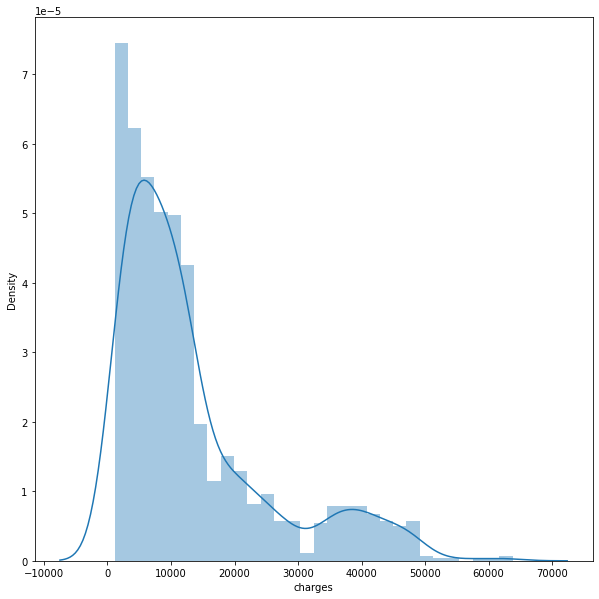

          Coefficient
age       3576.621477
sex        -12.160916
bmi       2030.708743
children   536.854294
smoker    9509.156511
region    -319.054720


In [10]:
#####################################
###           TP FINAL            ### 
### MIRO FRANCO - DNI: 41.672.314 ###
#####################################


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression

def resolver_ruta(ruta_relativa):
    if hasattr(sys, '_MEIPASS'):
        return os.path.join(sys._MEIPASS, ruta_relativa)
    return os.path.join(os.path.abspath('.'), ruta_relativa)

filepath = resolver_ruta('trabajo_practico\\cvs_para_el_TP\\seguro.csv')

dataset = pd.read_csv(filepath)

print(f'DIMENSION DATASET: {dataset.shape}')
print()
print(f'DESCRIPCION DATASET: ')
print(dataset.describe())
print()
print('COLUMNAS CON ALGUN NaN:')
print(dataset.isnull().any())

#Las variables independiente seran 'age','sex','bmi','children','smoker','region'
X = dataset.iloc[:, :-1].values #Matriz con tamaños
#La variable dependiente sera el 'charges'
y = dataset.iloc[:,6].values #Matriz de pesos

#Traduciendo a dato numerico las columnas 'sex','smoker' y 'region'
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
X[:, 5] = labelencoder_X.fit_transform(X[:, 5])

print(X[:,1])
print(X[:,4])
print(X[:,5])

#Grafico de regresion lineal multiple con los datos iniciales
plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(dataset['charges'])
plt.show()


#Dividimos los datos en conjunto de entrenamiento y conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Escalamos los datos
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Se crea el modelo con los datos de entrenamiento
regressor = LinearRegression()
regressor.fit(X_train, y_train)

df = dataset.drop(['charges'], axis=1)
df = df.T
df = df.index

coeff_df = pd.DataFrame(regressor.coef_, df, columns=['Coefficient']) 
print(coeff_df)






     time      cal
0    0.45  0.34170
1    0.45 -0.00438
2    0.45  0.82531
3    1.30  1.77967
4    1.30  0.95384
5    1.30  0.64080
6    2.40  1.75136
7    2.40  1.27497
8    2.40  1.17332
9    4.00  3.12273
10   4.00  2.60958
11   4.00  2.57429
12   6.10  3.17881
13   6.10  3.00782
14   6.10  2.67061
15   8.05  3.05959
16   8.05  3.94321
17   8.05  3.43726
18  11.15  4.80735
19  11.15  3.35583
20  11.15  2.78309
21  13.15  5.13825
22  13.15  4.70274
23  13.15  4.25702
24  15.00  3.60407
25  15.00  4.15029
26  15.00  3.42484
Tiempo:  [ 0.45  0.45  0.45  1.3   1.3   1.3   2.4   2.4   2.4   4.    4.    4.
  6.1   6.1   6.1   8.05  8.05  8.05 11.15 11.15 11.15 13.15 13.15 13.15
 15.   15.   15.  ]
Calcio:  [ 3.41700e-01 -4.38000e-03  8.25310e-01  1.77967e+00  9.53840e-01
  6.40800e-01  1.75136e+00  1.27497e+00  1.17332e+00  3.12273e+00
  2.60958e+00  2.57429e+00  3.17881e+00  3.00782e+00  2.67061e+00
  3.05959e+00  3.94321e+00  3.43726e+00  4.80735e+00  3.35583e+00
  2.78309e+00  5.13825

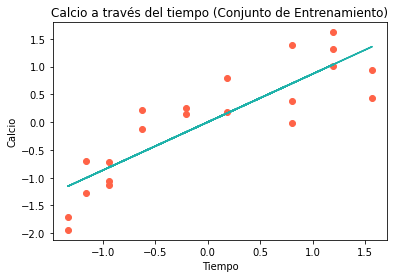

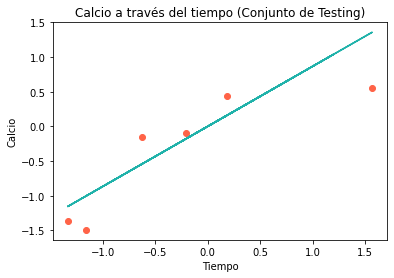

Error Medio Absoluto (MAE):  0.3760821737939721
Error cuadrático medio (MSE):  0.19343984625955526
Raíz cuadrada del error cuadrático medio (RMSE):  0.43981796945958823


'\nSe puede observar una relación entre el tiempo transcurrido y un aumento de calcio hasta llegar a un pico en el tiempo promedio.\nUna vez que se observa la segunda mitad del tiempo transcurrido, la medida del calcio puede ser mayor o menor según el momento,\npero siempre por encima del valor obtenido a la mitad del estudio.\nSe puede observar que tanto en el conjunto de entrenamiento como en el conjunto de testing se obtienen una equidad de valores\npor encima y por debajo de la mitad, si se tiene en cuenta desde el comienzo hasta el final del estudio.\n'

In [11]:
#Elijo el dataset 'calcium'
#Variable dependiente = 'cal'
#Varialble independiente = 'time'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def resolver_ruta(ruta_relativa):
    if hasattr(sys, '_MEIPASS'):
        return os.path.join(sys._MEIPASS, ruta_relativa)
    return os.path.join(os.path.abspath('.'), ruta_relativa)

dataset = pd.read_csv(resolver_ruta('trabajo_practico\\calcium.csv'), usecols= ['time','cal'])
print(dataset)

#Separo en X los datos de Tiempo y en Y los datos de Calcio
X = dataset.iloc[:,0].values
Y = dataset.iloc[:,1].values

print("Tiempo: ", X)
print("Calcio: ", Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

print("X_Train: ", X_train)
print("X_Test: ", X_test)
print("Y_Train: ", Y_train)
print("Y_Test: ", Y_test)

#Escalar los datos para asignar rangos similares a todos los valores
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

#Como estoy trabajando con vectores utilizo '.reshape' para convertirlo en Matriz y usarlo como argumento para 'transform'. Luego utilizo 'squeeze' para volverlo a vector
X_train = np.squeeze(sc_X.fit_transform(X_train.reshape(-1, 1)))
X_test = np.squeeze(sc_X.transform(X_test.reshape(-1,1)))

sc_Y = StandardScaler()
Y_train = np.squeeze(sc_Y.fit_transform(Y_train.reshape(-1, 1)))
Y_test = np.squeeze(sc_Y.transform(Y_test.reshape(-1,1)))

print("X_Train escalado: ", X_train)
print("X_Test escalado: ", X_test)
print("Y_Train escalado: ", Y_train)
print("Y_Test escalado: ", Y_test)


#Regresión linear simple

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train.reshape(-1,1),Y_train.reshape(-1,1))
Y_pred = regression.predict(X_test.reshape(-1,1))

#Gráfico de entrenamiento
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicción': Y_pred.flatten()})
plt.scatter(X_train, Y_train, color = "#FF6347")
plt.plot(X_train, regression.predict(X_train.reshape(-1,1)), color = "#20B2AA")
plt.title("Calcio a través del tiempo (Conjunto de Entrenamiento)")
plt.xlabel("Tiempo")
plt.ylabel("Calcio")
plt.show()

#Gráfico de testing
plt.scatter(X_test, Y_test, color = "#FF6347")
plt.plot(X_train, regression.predict(X_train.reshape(-1,1)), color = "#20B2AA")
plt.title("Calcio a través del tiempo (Conjunto de Testing)")
plt.xlabel("Tiempo")
plt.ylabel("Calcio")
plt.show()

#Métricas de gráficos
from sklearn import metrics

print("Error Medio Absoluto (MAE): ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Error cuadrático medio (MSE): ", metrics.mean_squared_error(Y_test, Y_pred))
print("Raíz cuadrada del error cuadrático medio (RMSE): ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#Conclusión

"""
Se puede observar una relación entre el tiempo transcurrido y un aumento de calcio hasta llegar a un pico en el tiempo promedio.
Una vez que se observa la segunda mitad del tiempo transcurrido, la medida del calcio puede ser mayor o menor según el momento,
pero siempre por encima del valor obtenido a la mitad del estudio.
Se puede observar que tanto en el conjunto de entrenamiento como en el conjunto de testing se obtienen una equidad de valores
por encima y por debajo de la mitad, si se tiene en cuenta desde el comienzo hasta el final del estudio.
"""